In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
file = "D:\codes_python\sds project\games_cleaned.csv"
games = pd.read_csv(file)

In [3]:
games.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [4]:
games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,"['d4', 'Nf6', 'c4', 'c6', 'd5', 'e6', 'Nc3', '...",A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,"['Nf3', 'c5', 'd4', 'cxd4', 'Nxd4', 'd5', 'g3'...",A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,"['e4', 'd5']",B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,"['e4', 'e5', 'Bc4', 'c6', 'Qh5', 'd5', 'exd5',...",C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,"['e4', 'Nc6', 'd4', 'd5', 'e5', 'Qd7', 'Be2', ...",B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,"['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Bxc6'...",C68,Ruy Lopez: Exchange Variation,7.0,181.858500
9363,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,"['e4', 'c5', 'd4', 'cxd4', 'Qxd4', 'Nc6', 'Qe3...",B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
9364,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,"['f4', 'f6', 'e3', 'e5', 'fxe5', 'fxe5', 'Qh5+...",A02,Bird Opening,1.0,157.164167
9365,ayNGChBy,1.0,79.0,resign,black,10+0,dastan-2009,1593.0,summu,1885.0,"['e4', 'c5', 'Nf3', 'd6', 'd4', 'cxd4', 'Nxd4'...",B90,Sicilian Defense: Najdorf Variation | English...,11.0,86.955000


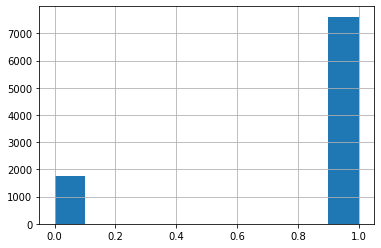

In [5]:
games["rated"].hist()

([<matplotlib.patches.Wedge at 0x1ef05034c48>,
 [Text(-0.9154995181239615, 0.6098037654153952, '1.0'),
  Text(0.9154995181239612, -0.6098037654153958, '0.0')])

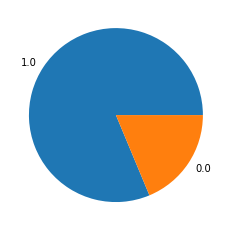

In [6]:
data = dict(games["rated"].value_counts())
plt.pie(data.values(), labels = data.keys())

In [7]:
games["turns"].isnull().sum()

0

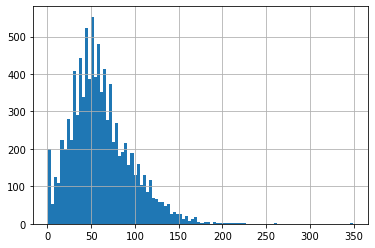

In [14]:
games["turns"].hist(bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef07b6c588>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef07b6cf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef07b62dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef07b73b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef07b73f88>],
 'means': []}

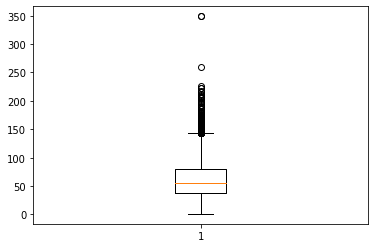

In [16]:
plt.boxplot(games["turns"])

We can see many outliers here. We will clean them later.

In [17]:
games["victory_status"].isnull().sum()

18

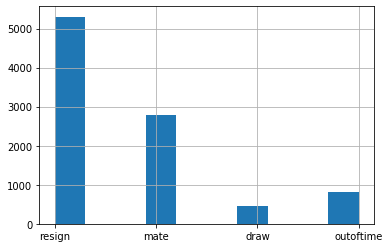

In [18]:
games["victory_status"].hist()

([<matplotlib.patches.Wedge at 0x1ef07c45948>,
 [Text(-0.23059477068122566, 1.0755584836420906, 'resign'),
  Text(-0.23492967596202846, -1.074619954845608, 'mate'),
  Text(0.9215264958076568, -0.600657071484604, 'outoftime'),
  Text(1.0874475588278905, -0.16570397339612, 'draw')])

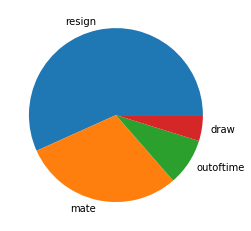

In [19]:
data = dict(games["victory_status"].value_counts())
plt.pie(data.values(), labels = data.keys())

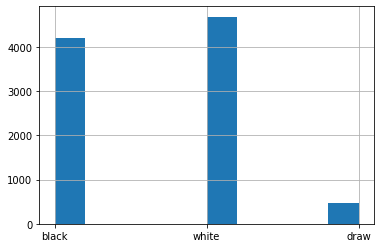

In [20]:
games["winner"].hist()

([<matplotlib.patches.Wedge at 0x1ef07cff388>,
 [Text(-0.0053607847347072165, 1.0999869371892688, 'white'),
  Text(-0.16555688855892267, -1.0874699612636152, 'black'),
  Text(1.0866501935817894, -0.1708547827503227, 'draw')])

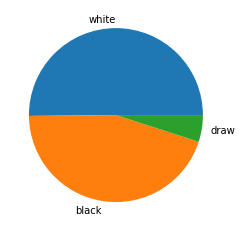

In [21]:
data = dict(games["winner"].value_counts())
plt.pie(data.values(), labels = data.keys())

In [22]:
games["winner"].isnull().sum()

20

In [24]:
games["increment_code"].isnull().sum()

0

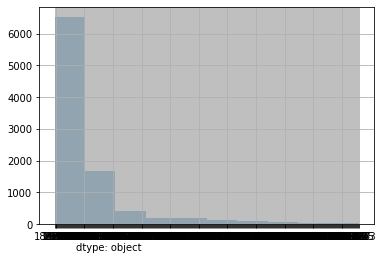

In [25]:
games["increment_code"].hist()

([<matplotlib.patches.Wedge at 0x1ef082d57c8>,
 [Text(0.3778587672074091, 1.0330647375864193, '10+0'),
  Text(-0.9572363167837398, 0.5419396957506434, '15+0'),
  Text(-1.0765317175702909, 0.22600765709408976, '15+15'),
  Text(-1.0995634925578572, -0.030985897340033302, '5+5'),
  Text(-1.0667466235710115, -0.2684243675597408, '5+8'),
  Text(-0.9885134573032811, -0.482536158987401, '8+0'),
  Text(-0.8736889795217326, -0.6683319288065427, '10+5'),
  Text(-0.743379629693656, -0.8107938863586251, '15+10'),
  Text(-0.6218782914815162, -0.9073408348487523, '10+10'),
  Text(-0.5090457440650207, -0.9751268791543436, '20+0'),
  Text(-0.393406687308785, -1.027244458919457, '30+0'),
  Text(-0.27539516120853647, -1.0649683118210251, '7+2'),
  Text(-0.16593526284711843, -1.087412290046355, '15+5'),
  Text(-0.07354627319855145, -1.097538585061411, '30+30'),
  Text(0.003873768930839658, -1.0999931790307933, '10+2'),
  Text(0.0698648953519665, -1.097779074494253, '25+0'),
  Text(0.12754616032409963, -1

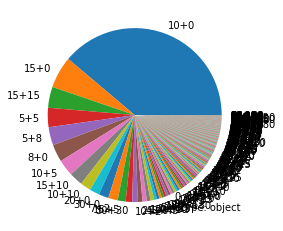

In [26]:
data = dict(games["increment_code"].value_counts())
plt.pie(data.values(), labels = data.keys())

<BarContainer object of 316 artists>

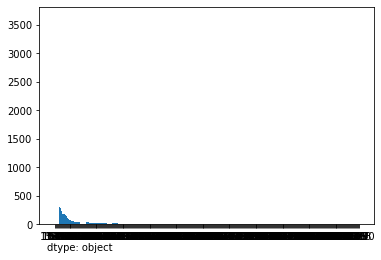

In [30]:
data = dict(games["increment_code"].value_counts())
plt.bar(height = data.values(), x = data.keys())

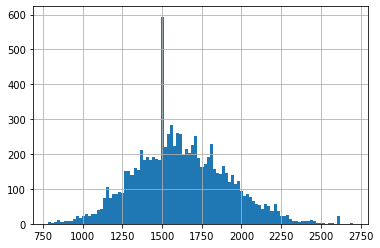

In [38]:
games["white_rating"].hist(bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef0d938948>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef0d93d908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef0d934e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef0d93dfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef0d940fc8>],
 'means': []}

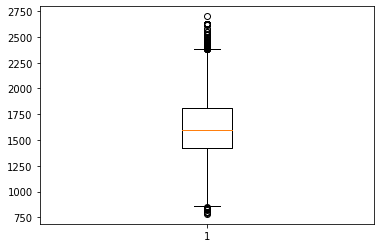

In [39]:
plt.boxplot(games["white_rating"])

There are outliers in the white_rating. We will clean them later

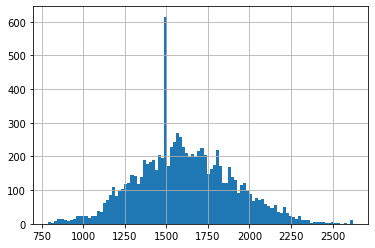

In [40]:
games["black_rating"].hist(bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef0db2f748>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef0db2fe88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef0db2bd08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef0db34f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef0db38e08>],
 'means': []}

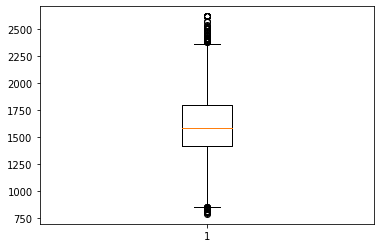

In [41]:
plt.boxplot(games["black_rating"])

There are outliers in the black_rating. We will clean them later

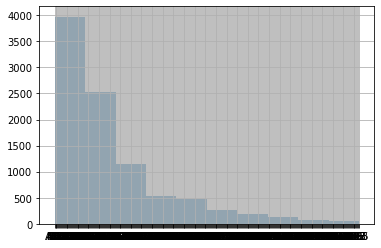

In [42]:
games["opening_eco"].hist()

<BarContainer object of 334 artists>

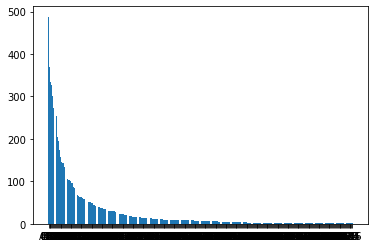

In [46]:
data = dict(games["opening_eco"].value_counts())
plt.bar(height = data.values(), x = data.keys())

([<matplotlib.patches.Wedge at 0x1ef10c2c308>,
 [Text(1.0852114435170557, 0.17976685695541514, 'A00'),
  Text(0.9891541941270541, 0.48122134225412183, 'C00'),
  Text(0.8486438493019651, 0.6998597124009522, 'C41'),
  Text(0.6737035276513238, 0.8695536537961083, 'D00'),
  Text(0.4763908311829773, 0.9914896751680232, 'A40'),
  Text(0.27656126081186194, 1.064666083341699, 'B01'),
  Text(0.07671982002667369, 1.0973213153926586, 'C20'),
  Text(-0.12425085333302892, 1.0929600749551716, 'C50'),
  Text(-0.3143411292948795, 1.054129809100198, 'B20'),
  Text(-0.48968858057872644, 0.9849898954054261, 'B00'),
  Text(-0.6353468896564438, 0.8979612072934346, 'C40'),
  Text(-0.7495258781584689, 0.8051154935602569, 'D02'),
  Text(-0.8429659399446867, 0.7066883500477216, 'C44'),
  Text(-0.9162706982015713, 0.6086444016149375, 'C42'),
  Text(-0.9736177432496396, 0.5119262544834746, 'C45'),
  Text(-1.0188500652306556, 0.4146619642304912, 'B07'),
  Text(-1.0540769218636452, 0.31451842997583257, 'C55'),
  T

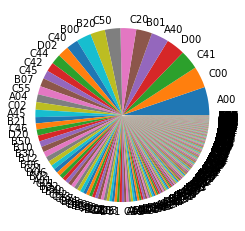

In [47]:
data = dict(games["opening_eco"].value_counts())
plt.pie(data.values(), labels = data.keys())

<BarContainer object of 1182 artists>

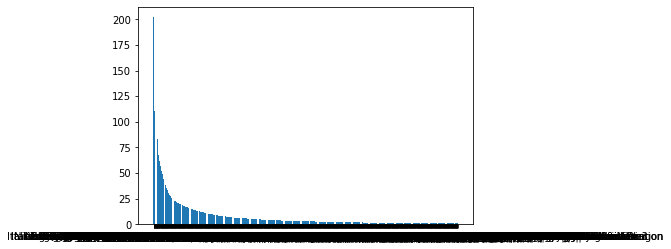

In [49]:
data = dict(games["opening_name"].value_counts())
plt.bar(height = data.values(), x = data.keys())

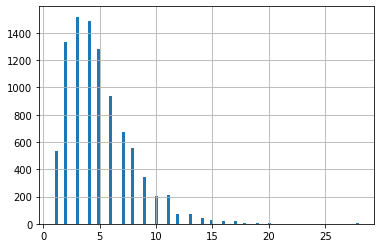

In [52]:
games["opening_ply"].hist(bins = 100)

<BarContainer object of 23 artists>

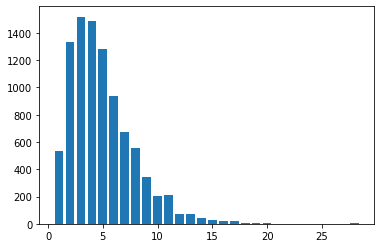

In [53]:
data = dict(games["opening_ply"].value_counts())
plt.bar(height = data.values(), x = data.keys())

We can find outliers in this plot. We will handle them later.

([<matplotlib.patches.Wedge at 0x1ef16f43048>,
 [Text(0.960310664595098, 0.5364731376918338, '3.0'),
  Text(0.05955283135932176, 1.0983867535058351, '4.0'),
  Text(-0.8561398983749382, 0.6906695841070105, '2.0'),
  Text(-1.0780968101864263, -0.21841993468054405, '5.0'),
  Text(-0.644502589257528, -0.8914125938309052, '6.0'),
  Text(-0.09267548261782416, -1.0960890725308567, '7.0'),
  Text(0.35594788092400703, -1.0408175181393273, '8.0'),
  Text(0.7056365703665279, -0.8438465681398274, '1.0'),
  Text(0.9205803253951051, -0.6021061903812671, '9.0'),
  Text(1.016249830599313, -0.4209943964079184, '11.0'),
  Text(1.0652908445788796, -0.2741448822364145, '10.0'),
  Text(1.0863617797278027, -0.1726791346591737, '12.0'),
  Text(1.0934717293567304, -0.11966443539164602, '13.0'),
  Text(1.097167938934899, -0.07888291179555974, '14.0'),
  Text(1.0986451356092357, -0.054578988650982964, '15.0'),
  Text(1.0993437143443863, -0.03799207458784633, '17.0'),
  Text(1.0997386206169444, -0.02397845540356

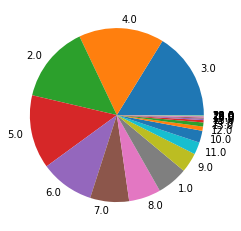

In [54]:
data = dict(games["opening_ply"].value_counts())
plt.pie(data.values(), labels = data.keys())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef1701f908>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef170268c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef1701be88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef17026f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef17029f88>],
 'means': []}

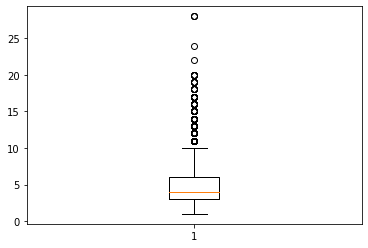

In [55]:
plt.boxplot(games["opening_ply"])

There are outliers in opening_ply. We will handle them later

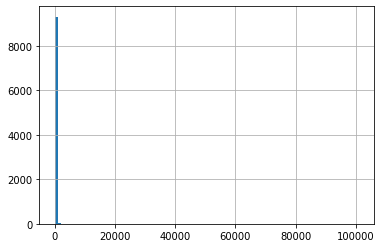

In [57]:
games["game_time"].hist(bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef2074f9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef20519c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef20768e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef205149c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef20501388>],
 'means': []}

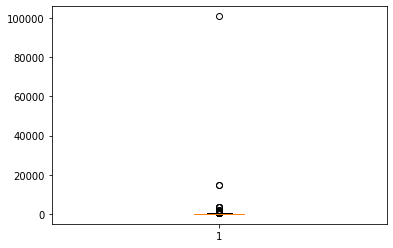

In [63]:
plt.boxplot(games["game_time"])

The game_time has outliers in it. We will handle them later.